# Naive Bayes

### Data preprocessing

In [1]:
# Importing the dataset
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[3:5]

In [2]:
head(dataset, 10)

Age,EstimatedSalary,Purchased
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
27,58000,0
27,84000,0
32,150000,1
25,33000,0
35,65000,0


In [3]:
# Encoding the target feature as factor
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

In [4]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(1234)
split = sample.split(dataset$Purchased, SplitRatio = 0.80)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [5]:
head(training_set, 10)

,Age,EstimatedSalary,Purchased
1,19,19000,0
2,35,20000,0
3,26,43000,0
4,27,57000,0
6,27,58000,0
7,27,84000,0
8,32,150000,1
9,25,33000,0
10,35,65000,0
11,26,80000,0


In [6]:
head(test_set, 10)

,Age,EstimatedSalary,Purchased
5,19,76000,0
15,18,82000,0
19,46,28000,1
29,29,43000,0
40,27,31000,0
42,33,51000,0
43,35,108000,0
54,35,23000,0
55,27,58000,0
76,34,112000,1


In [7]:
# Feature Scaling
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

In [8]:
head(training_set, 10)

,Age,EstimatedSalary,Purchased
1,-1.7872741,-1.4484668,0
2,-0.2616250,-1.4192933,0
3,-1.1198026,-0.7483016,0
4,-1.0244495,-0.3398719,0
6,-1.0244495,-0.3106983,0
7,-1.0244495,0.4478140,0
8,-0.5476842,2.3732684,1
9,-1.2151557,-1.0400371,0
10,-0.2616250,-0.1064835,0
11,-1.1198026,0.3311198,0


In [9]:
head(test_set, 10)

,Age,EstimatedSalary,Purchased
5,-1.7389632,0.05682598,0
15,-1.8339885,0.23746484,0
19,0.8267202,-1.38828495,1
29,-0.7887101,-0.93668779,0
40,-0.9787607,-1.29796552,0
42,-0.4086088,-0.69583597,0
43,-0.2185582,1.02023326,0
54,-0.2185582,-1.53881734,0
55,-0.9787607,-0.48509062,0
76,-0.3135835,1.14065918,1


### Fitting Naive Bayes classifier to the Training set

In [10]:
library(e1071)
classifier = naiveBayes(x = training_set[-3],
                        y = training_set$Purchased)

### Predicting the Test set results

In [11]:
y_pred = predict(classifier, newdata = test_set[-3])

In [12]:
head(y_pred, 10)

[1] 0 0 1 0 0 0 0 0 0 0
Levels: 0 1

In [13]:
head(test_set[3], 10)

,Purchased
5,0
15,0
19,1
29,0
40,0
42,0
43,0
54,0
55,0
76,1


### Making the Confusion Matrix

In [14]:
cm = table(test_set[, 3], y_pred)
cm

   y_pred
     0  1
  0 48  3
  1  6 23

* * *

**classifier made 48 + 23 = 71 correct prediction and 6 + 3 = 9 incoreect predictions.**

* * *

### Visualising the Training set results

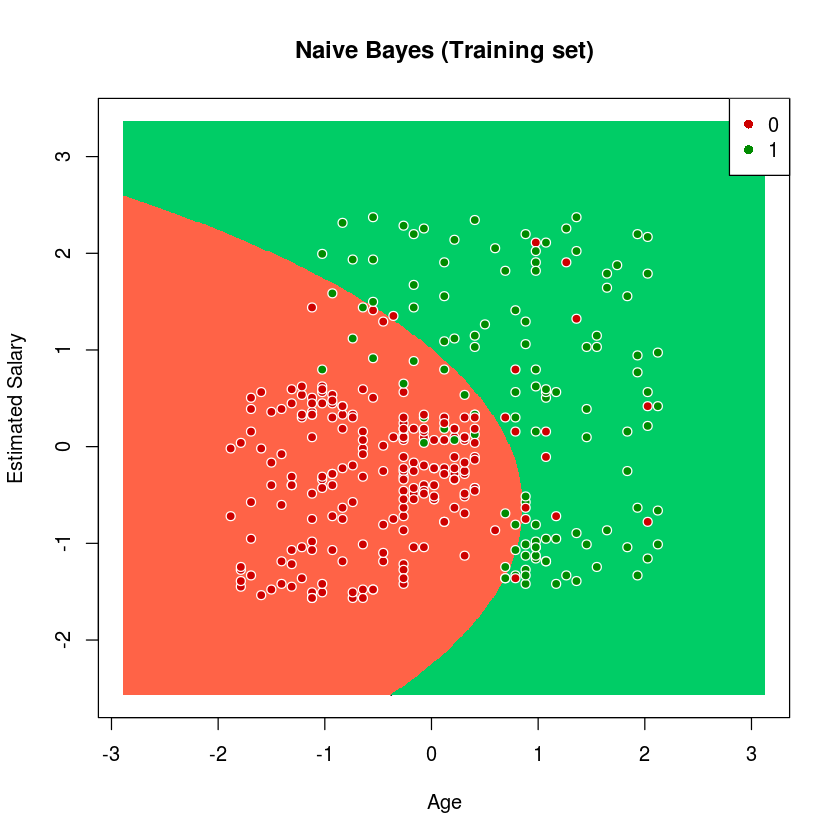

In [15]:
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'Naive Bayes (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'), col='white')
legend("topright", legend = c("0", "1"), pch = 16, col = c('red3', 'green4'))

### Visualising the Test set results

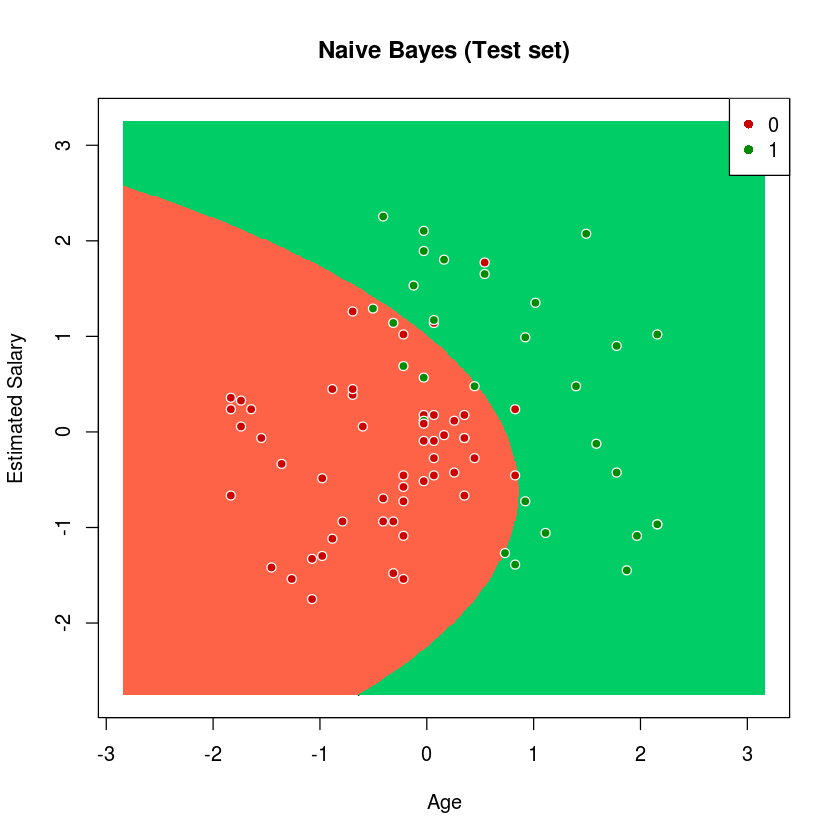

In [16]:
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'Naive Bayes (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'), col='white')
legend("topright", legend = c("0", "1"), pch = 16, col = c('red3', 'green4'))

***

**Naive Bayes is another non-linear classifier. It works on the principle of Bayes theorem.**

Here we can see that we got a pretty good classifier with very fewer incorrect predictions. Though no classifier is 100% correct. 

**Every classifier is** *wrong* **, but some are** *useful*.

* * *